Posterior at θ = 0.75 is 2.753
Posterior at θ = 0.25 is 0.034
Posterior at θ = 1.00 is 0.000

Maximum posterior density at θ = 0.700 with value 2.93510



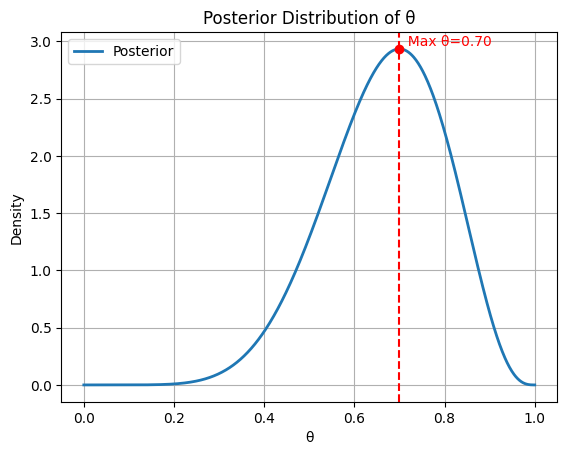

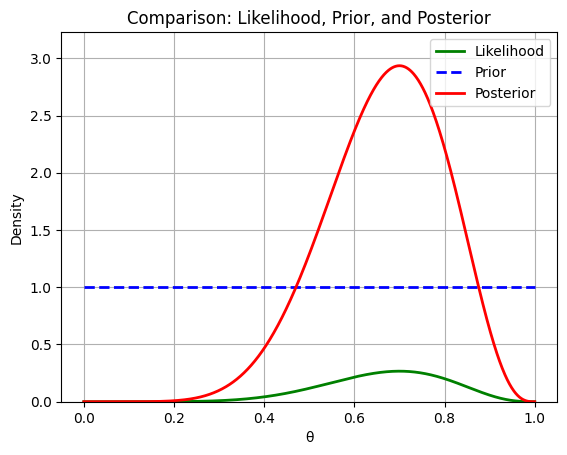

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb
from scipy.stats import norm

# Question 1:

# Given data
y = 7
n = 10
constant = comb(n, y) * 11  # equivalent to choose(n, y) * 11 in R

# Define densities
def posterior_density(theta):
    if 0 <= theta <= 1:
        return constant * theta**y * (1 - theta)**(n - y)
    else:
        return 0

def likelihood_density(theta):
    if 0 <= theta <= 1:
        return comb(n, y) * theta**y * (1 - theta)**(n - y)
    else:
        return 0

def prior_density(theta):
    return 1 if 0 <= theta <= 1 else 0

# Evaluate at specific theta values
theta_values = [0.75, 0.25, 1]
for theta in theta_values:
    print(f"Posterior at θ = {theta:.2f} is {posterior_density(theta):.3f}")

# Grid for theta
theta_seq = np.linspace(0, 1, 1000)
post_vals = np.array([posterior_density(t) for t in theta_seq])
like_vals = np.array([likelihood_density(t) for t in theta_seq])
prior_vals = np.array([prior_density(t) for t in theta_seq])

# Find maximum posterior
max_idx = np.argmax(post_vals)
theta_max = theta_seq[max_idx]
post_max = post_vals[max_idx]
print(f"\nMaximum posterior density at θ = {theta_max:.3f} with value {post_max:.5f}\n")

# Plot Posterior Distribution
plt.figure()
plt.plot(theta_seq, post_vals, label='Posterior', linewidth=2)
plt.scatter([theta_max], [post_max], color='red', zorder=5)
plt.axvline(theta_max, color='red', linestyle='--')
plt.text(theta_max, post_max, f"  Max θ={theta_max:.2f}", color='red', va='bottom')
plt.title("Posterior Distribution of θ")
plt.xlabel("θ")
plt.ylabel("Density")
plt.legend()
plt.grid(True)

# Plot comparison: Likelihood, Prior, Posterior
plt.figure()
plt.plot(theta_seq, like_vals, label='Likelihood', color='green', linewidth=2)
plt.plot(theta_seq, prior_vals, label='Prior', color='blue', linestyle='--', linewidth=2)
plt.plot(theta_seq, post_vals, label='Posterior', color='red', linewidth=2)
plt.title("Comparison: Likelihood, Prior, and Posterior")
plt.xlabel("θ")
plt.ylabel("Density")
plt.legend(loc='upper right')
plt.ylim(0, post_vals.max() * 1.1)
plt.grid(True)


Unnormalized Posterior at μ values:
  μ = 300: 6.82e-41
  μ = 900: 0.00e+00
  μ = 50: 9.69e-138

Maximum unnormalized posterior at μ = 360.66 with value 4.91e-37



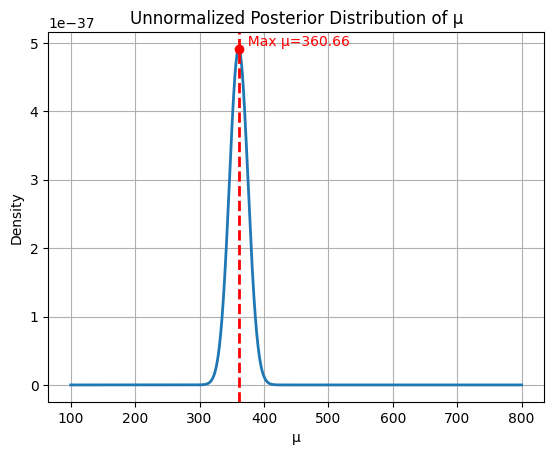

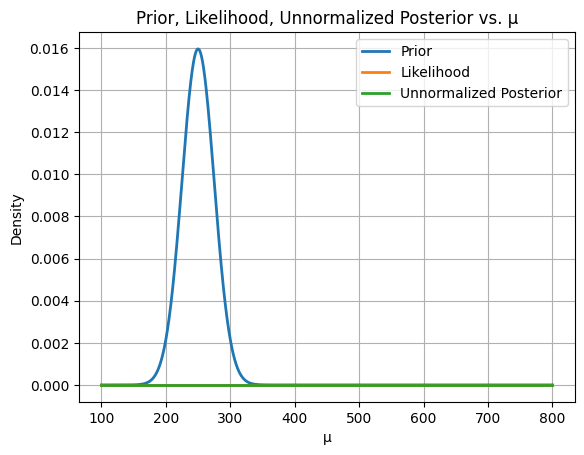

In [ ]:
# Question 2:

# Given data
y_data = np.array([300, 270, 390, 450, 500, 290, 680, 450])
sigma = 50
mu_values = [300, 900, 50]

# Define densities
def gaussian_likelihood(mu):
    return np.prod(norm.pdf(y_data, loc=mu, scale=sigma))

def gaussian_prior(mu):
    return norm.pdf(mu, loc=250, scale=25)

def gaussian_posterior(mu):
    return gaussian_likelihood(mu) * gaussian_prior(mu)

# Evaluate at specific mu values
print("\nUnnormalized Posterior at μ values:")
for mu in mu_values:
    print(f"  μ = {mu}: {gaussian_posterior(mu):.2e}")

# Grid for mu
mu_seq = np.linspace(100, 800, 1000)
posterior_vals2 = np.array([gaussian_posterior(mu) for mu in mu_seq])

# Find maximum posterior
max_idx2 = np.argmax(posterior_vals2)
max_mu = mu_seq[max_idx2]
max_post = posterior_vals2[max_idx2]
print(f"\nMaximum unnormalized posterior at μ = {max_mu:.2f} with value {max_post:.2e}\n")

# Plot Unnormalized Posterior for μ
plt.figure()
plt.plot(mu_seq, posterior_vals2, linewidth=2)
plt.axvline(max_mu, color='red', linestyle='--', linewidth=2)
plt.scatter([max_mu], [max_post], color='red', zorder=5)
plt.text(max_mu, max_post, f"  Max μ={max_mu:.2f}", color='red', va='bottom')
plt.title("Unnormalized Posterior Distribution of μ")
plt.xlabel("μ")
plt.ylabel("Density")
plt.grid(True)

# Plot comparison: Prior, Likelihood, Unnormalized Posterior
prior_plot = np.array([gaussian_prior(mu) for mu in mu_seq])
likelihood_plot = np.array([gaussian_likelihood(mu) for mu in mu_seq])

plt.figure()
plt.plot(mu_seq, prior_plot, label='Prior', linewidth=2)
plt.plot(mu_seq, likelihood_plot, label='Likelihood', linewidth=2)
plt.plot(mu_seq, posterior_vals2, label='Unnormalized Posterior', linewidth=2)
plt.title("Prior, Likelihood, Unnormalized Posterior vs. μ")
plt.xlabel("μ")
plt.ylabel("Density")
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

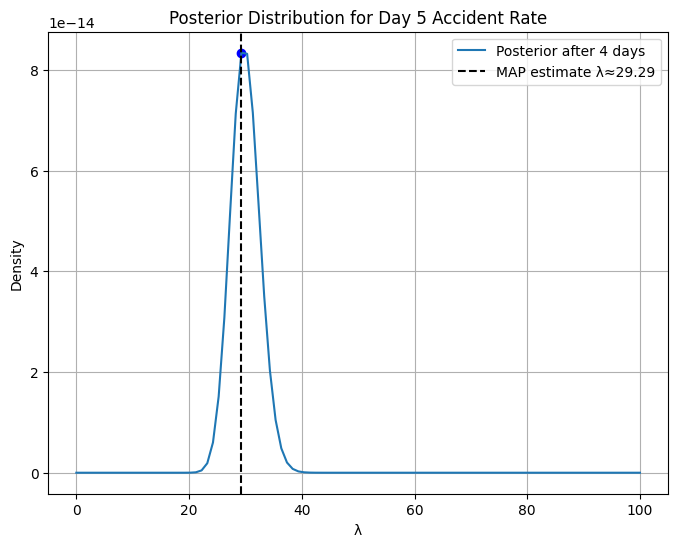

Analytically, the conjugate posterior is Gamma(135.0, 6.0)



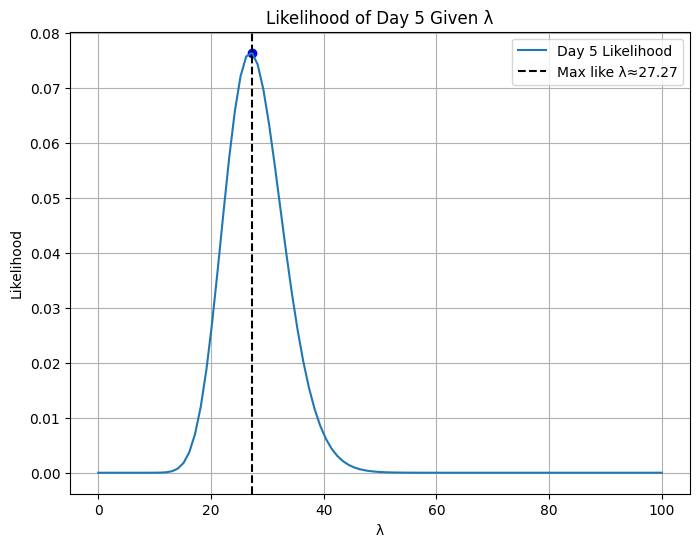

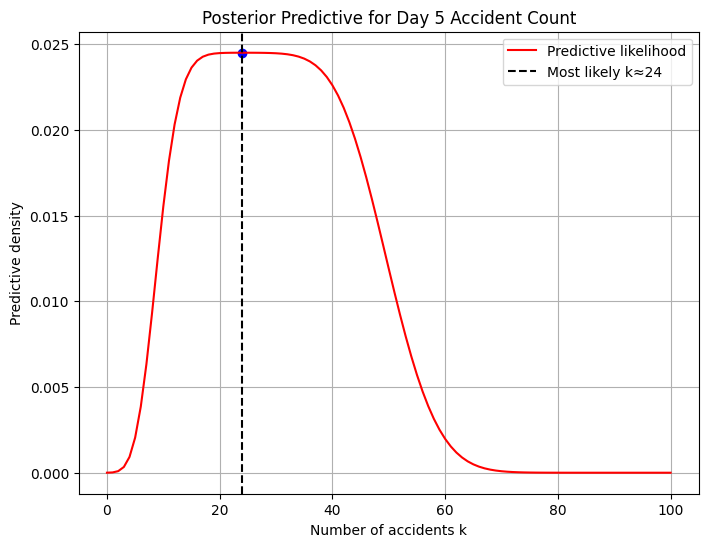


Predicted accidents on Day 5: around 24 to 25


In [ ]:
# Question 3:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
from math import factorial

observed_accidents = [25, 20, 23, 27]
λ_values = np.linspace(0, 100, 100)

# Prior is Gamma(shape=40, scale=2)
def gamma_prior_pdf(λ):
    return gamma.pdf(λ, a=40, scale=2)

# Poisson likelihood for observing k accidents given rate λ
def poisson_likelihood(λ, k):
    return (λ**k) * np.exp(-λ) / factorial(k)

prior_pdf = gamma_prior_pdf(λ_values).copy()

for k in observed_accidents:
    like = poisson_likelihood(λ_values, k)
    prior_pdf *= like

posterior_pdf = prior_pdf
λ_map = λ_values[np.argmax(posterior_pdf)]

plt.figure(figsize=(8, 6))
plt.plot(λ_values, posterior_pdf, label='Posterior after 4 days')
plt.axvline(λ_map, linestyle='--', color='black',
            label=f'MAP estimate λ≈{λ_map:.2f}')
plt.scatter(λ_map, posterior_pdf.max(), color='blue')
plt.title('Posterior Distribution for Day 5 Accident Rate')
plt.xlabel('λ')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

print("Analytically, the conjugate posterior is Gamma(135.0, 6.0)\n")

like_pdf = poisson_likelihood(λ_values, observed_accidents[-1])
λ_like = λ_values[np.argmax(like_pdf)]

plt.figure(figsize=(8, 6))
plt.plot(λ_values, like_pdf, label='Day 5 Likelihood')
plt.axvline(λ_like, linestyle='--', color='black',
            label=f'Max like λ≈{λ_like:.2f}')
plt.scatter(λ_like, like_pdf.max(), color='blue')
plt.title('Likelihood of Day 5 Given λ')
plt.xlabel('λ')
plt.ylabel('Likelihood')
plt.legend()
plt.grid(True)
plt.show()

λ_grid = np.linspace(10, 50, 50)
k_grid = np.arange(0, 101)
predictive = np.array([
    np.mean([poisson_likelihood(λ, k) for λ in λ_grid])
    for k in k_grid
])

k_pred = k_grid[np.argmax(predictive)]
plt.figure(figsize=(8, 6))
plt.plot(k_grid, predictive, 'r-', label='Predictive likelihood')
plt.axvline(k_pred, linestyle='--', color='black',
            label=f'Most likely k≈{k_pred}')
plt.scatter(k_pred, predictive.max(), color='blue')
plt.title('Posterior Predictive for Day 5 Accident Count')
plt.xlabel('Number of accidents k')
plt.ylabel('Predictive density')
plt.legend()
plt.grid(True)
plt.show()

print(f'\nPredicted accidents on Day 5: around {k_pred} to {k_pred+1}')

In [ ]:
# Question 4

url = "https://raw.githubusercontent.com/yadavhimanshu059/CGS698C/main/notes/Module-2/recognition.csv"
data = pd.read_csv(url)
data = data.iloc[:, 1:]
data.head()

,Tw,Tnw
0,285.077952,296.806019
1,267.518382,280.115725
2,289.920350,310.441680
3,399.067408,324.827633
4,359.988353,373.815164


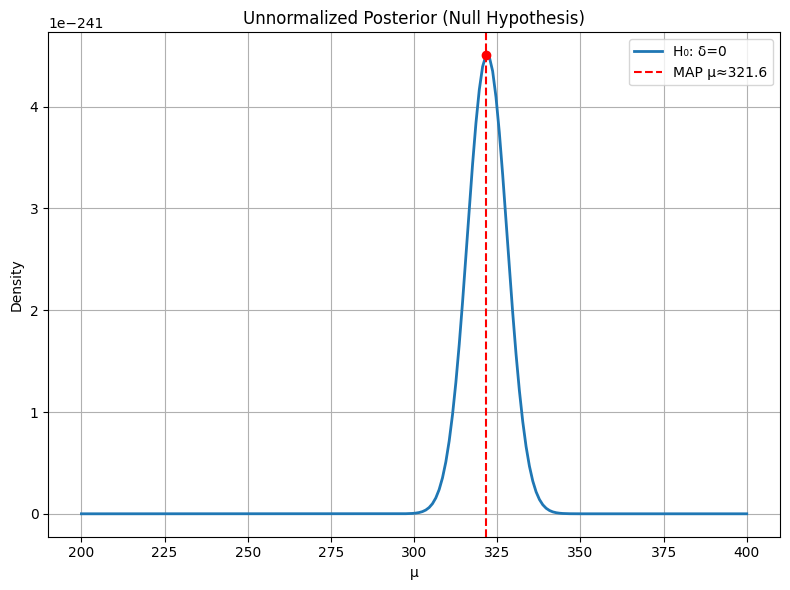

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

sigma = 60
mu_vals = np.linspace(200, 400, 200)
tw = data["Tw"].values
tnw = data["Tnw"].values

priors   = norm.pdf(mu_vals, loc=300, scale=50)
likes_tw = np.prod(norm.pdf(tw[:, None], loc=mu_vals[None, :], scale=sigma), axis=0)
likes_tnw= np.prod(norm.pdf(tnw[:, None], loc=mu_vals[None, :], scale=sigma), axis=0)
post_null = priors * likes_tw * likes_tnw

idx_map = np.argmax(post_null)
mu_map  = mu_vals[idx_map]
post_map= post_null[idx_map]

plt.figure(figsize=(8, 6))
plt.plot(mu_vals, post_null, label='H₀: δ=0', linewidth=2)
plt.axvline(mu_map, color='red', linestyle='--', label=f'MAP μ≈{mu_map:.1f}')
plt.scatter(mu_map, post_map, color='red', zorder=5)
plt.title('Unnormalized Posterior (Null Hypothesis)')
plt.xlabel('μ')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

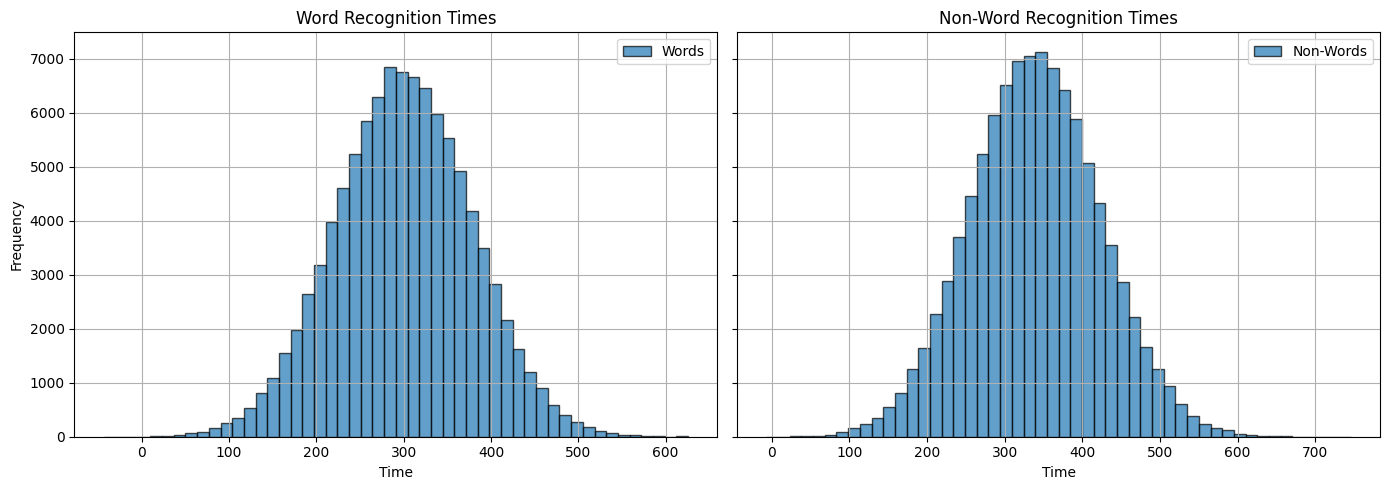

In [ ]:
N = 100_000
base_rates = np.random.normal(loc=300, scale=50, size=N)
offsets    = np.abs(np.random.normal(loc=0, scale=50, size=N))

# Generate recognition times
word_times    = np.random.normal(loc=base_rates,            scale=sigma)
nonword_times = np.random.normal(loc=base_rates + offsets,  scale=sigma)

fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Words
ax[0].hist(
    word_times,
    bins=50,
    alpha=0.7,
    edgecolor='k'
)
ax[0].set_title('Word Recognition Times')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Frequency')
ax[0].legend(['Words'])
ax[0].grid(True)

# Non-words
ax[1].hist(
    nonword_times,
    bins=50,
    alpha=0.7,
    edgecolor='k'
)
ax[1].set_title('Non-Word Recognition Times')
ax[1].set_xlabel('Time')
ax[1].legend(['Non-Words'])
ax[1].grid(True)

plt.tight_layout()
plt.show()

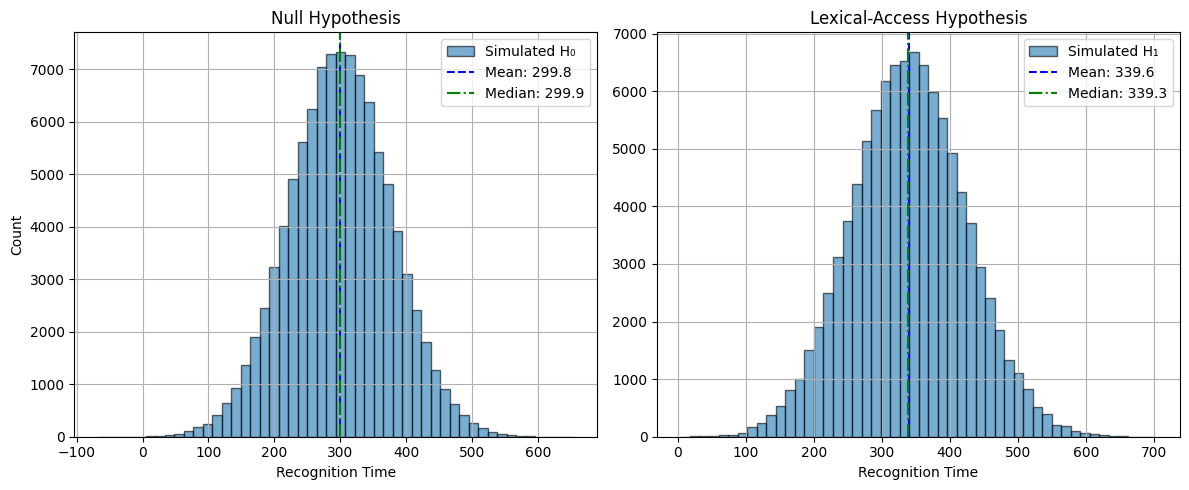

Null Hypothesis:   mean = 299.79, median = 299.95
Lexical Hypothesis: mean = 339.56, median = 339.27

Observation: The lexical-access model predicts a longer non-word recognition time than the null model.



In [ ]:
# Compute summary stats
null_mean = word_recog_time.mean()
null_median = np.median(word_recog_time)
lex_mean  = non_word_recog_time.mean()
lex_median = np.median(non_word_recog_time)

# Set up side-by-side histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Null hypothesis (simulated non-word under H₀)
axes[0].hist(
    word_recog_time,
    bins=50,
    alpha=0.6,
    edgecolor='black',
    label='Simulated H₀'
)
axes[0].axvline(null_mean, linestyle='--', color='blue',  label=f'Mean: {null_mean:.1f}')
axes[0].axvline(null_median, linestyle='-.', color='green', label=f'Median: {null_median:.1f}')
axes[0].set(
    title='Null Hypothesis',
    xlabel='Recognition Time',
    ylabel='Count'
)
axes[0].legend()
axes[0].grid(True)

# Lexical-access hypothesis (simulated non-word under H₁)
axes[1].hist(
    non_word_recog_time,
    bins=50,
    alpha=0.6,
    edgecolor='black',
    label='Simulated H₁'
)
axes[1].axvline(lex_mean, linestyle='--', color='blue',  label=f'Mean: {lex_mean:.1f}')
axes[1].axvline(lex_median, linestyle='-.', color='green', label=f'Median: {lex_median:.1f}')
axes[1].set(
    title='Lexical-Access Hypothesis',
    xlabel='Recognition Time'
)
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Print out the key stats
print(f'Null Hypothesis:   mean = {null_mean:.2f}, median = {null_median:.2f}')
print(f'Lexical Hypothesis: mean = {lex_mean:.2f}, median = {lex_median:.2f}\n')
print("Observation: The lexical-access model predicts a longer non-word recognition time than the null model.\n")

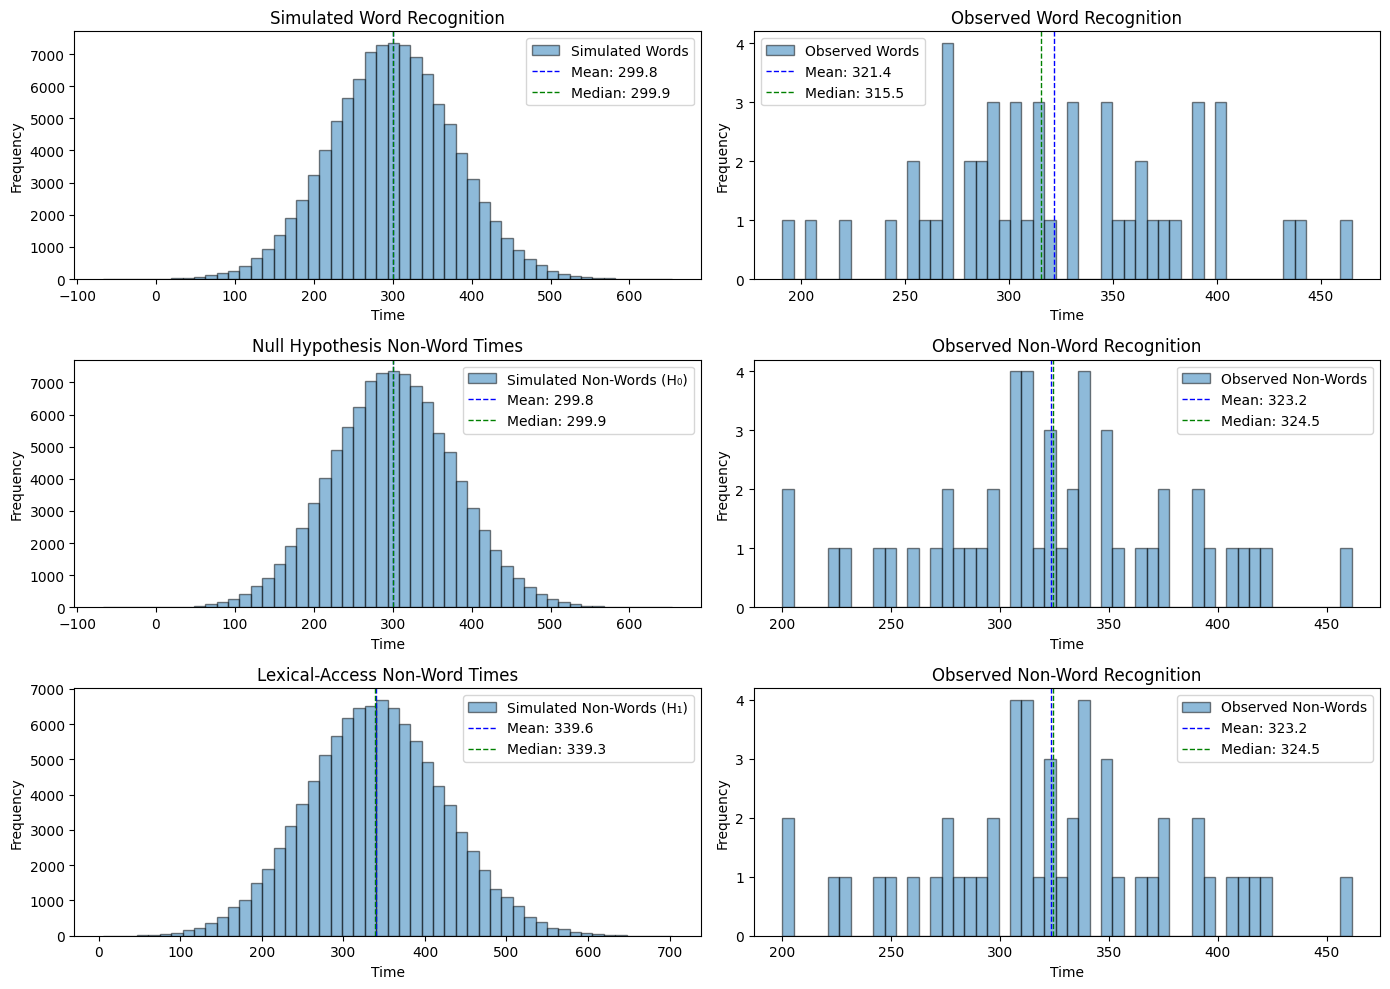


Since only the non-word predictions differ:

Null Hypothesis error:    7.3%
Lexical-Access error:      5.0%

The smaller error under the lexical-access model indicates a better fit.



In [ ]:
# Comparison of simulated vs. observed under both hypotheses
fig, axes = plt.subplots(3, 2, figsize=(14, 10))

# Panel 1: Simulated word times (both models yield same)
axes[0, 0].hist(word_recog_time, bins=50, alpha=0.5, edgecolor='black', label='Simulated Words')
axes[0, 0].axvline(mean_word, color='blue', linestyle='--', linewidth=1, label=f'Mean: {mean_word:.1f}')
axes[0, 0].axvline(median_word, color='green', linestyle='--', linewidth=1, label=f'Median: {median_word:.1f}')
axes[0, 0].set(title='Simulated Word Recognition', xlabel='Time', ylabel='Frequency')
axes[0, 0].legend()

# Panel 2: Observed word times
axes[0, 1].hist(data["Tw"], bins=50, alpha=0.5, edgecolor='black', label='Observed Words')
axes[0, 1].axvline(data["Tw"].mean(), color='blue', linestyle='--', linewidth=1,
                   label=f'Mean: {data["Tw"].mean():.1f}')
axes[0, 1].axvline(data["Tw"].median(), color='green', linestyle='--', linewidth=1,
                   label=f'Median: {data["Tw"].median():.1f}')
axes[0, 1].set(title='Observed Word Recognition', xlabel='Time', ylabel='Frequency')
axes[0, 1].legend()

# Panel 3: Simulated non-word times under null hypothesis
axes[1, 0].hist(word_recog_time, bins=50, alpha=0.5, edgecolor='black', label='Simulated Non-Words (H₀)')
axes[1, 0].axvline(mean_word, color='blue', linestyle='--', linewidth=1, label=f'Mean: {mean_word:.1f}')
axes[1, 0].axvline(median_word, color='green', linestyle='--', linewidth=1, label=f'Median: {median_word:.1f}')
axes[1, 0].set(title='Null Hypothesis Non-Word Times', xlabel='Time', ylabel='Frequency')
axes[1, 0].legend()

# Panel 4: Observed non-word times
axes[1, 1].hist(data["Tnw"], bins=50, alpha=0.5, edgecolor='black', label='Observed Non-Words')
axes[1, 1].axvline(data["Tnw"].mean(), color='blue', linestyle='--', linewidth=1,
                   label=f'Mean: {data["Tnw"].mean():.1f}')
axes[1, 1].axvline(data["Tnw"].median(), color='green', linestyle='--', linewidth=1,
                   label=f'Median: {data["Tnw"].median():.1f}')
axes[1, 1].set(title='Observed Non-Word Recognition', xlabel='Time', ylabel='Frequency')
axes[1, 1].legend()

# Panel 5: Simulated non-word times under lexical-access hypothesis
axes[2, 0].hist(non_word_recog_time, bins=50, alpha=0.5, edgecolor='black', label='Simulated Non-Words (H₁)')
axes[2, 0].axvline(mean_nonword, color='blue', linestyle='--', linewidth=1, label=f'Mean: {mean_nonword:.1f}')
axes[2, 0].axvline(median_nonword, color='green', linestyle='--', linewidth=1, label=f'Median: {median_nonword:.1f}')
axes[2, 0].set(title='Lexical-Access Non-Word Times', xlabel='Time', ylabel='Frequency')
axes[2, 0].legend()

# Panel 6: repeat observed non-word for reference
axes[2, 1].hist(data["Tnw"], bins=50, alpha=0.5, edgecolor='black', label='Observed Non-Words')
axes[2, 1].axvline(data["Tnw"].mean(), color='blue', linestyle='--', linewidth=1,
                   label=f'Mean: {data["Tnw"].mean():.1f}')
axes[2, 1].axvline(data["Tnw"].median(), color='green', linestyle='--', linewidth=1,
                   label=f'Median: {data["Tnw"].median():.1f}')
axes[2, 1].set(title='Observed Non-Word Recognition', xlabel='Time', ylabel='Frequency')
axes[2, 1].legend()

plt.tight_layout()
plt.show()

# Compute and display errors
obs_nonword_mean = data["Tnw"].mean()
error_null = abs(mean_word - obs_nonword_mean) / obs_nonword_mean * 100
error_lex = abs(mean_nonword - obs_nonword_mean) / obs_nonword_mean * 100

print("\nSince only the non-word predictions differ:\n")
print(f"Null Hypothesis error:    {error_null:.1f}%")
print(f"Lexical-Access error:      {error_lex:.1f}%")
print("\nThe smaller error under the lexical-access model indicates a better fit.\n")

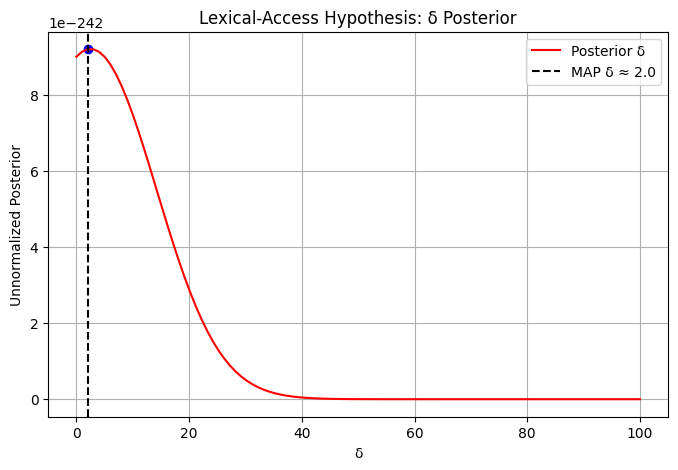

In [ ]:
δ_grid = np.linspace(0, 100, 100)
posterior_δ = []

for μ0 in np.random.normal(300, 50, 500):
    like_vals = [np.prod(norm.pdf(df["Tw"], loc=μ0, scale=σ)) *
                 np.prod(norm.pdf(df["Tnw"], loc=μ0 + δ, scale=σ))
                 for δ in δ_grid]
    prior_vals = truncnorm.pdf(δ_grid, a=0, b=np.inf, loc=0, scale=50)
    posterior_δ.append(like_vals * prior_vals)

mean_post_δ = np.mean(posterior_δ, axis=0)
best_idx = np.argmax(mean_post_δ)
δ_map = δ_grid[best_idx]

plt.figure(figsize=(8, 5))
plt.plot(δ_grid, mean_post_δ, color="r", label="Posterior δ")
plt.axvline(δ_map, linestyle="--", color="k", label=f"MAP δ ≈ {δ_map:.1f}")
plt.scatter(δ_map, mean_post_δ[best_idx], color="b")
plt.title("Lexical-Access Hypothesis: δ Posterior")
plt.xlabel("δ")
plt.ylabel("Unnormalized Posterior")
plt.legend()
plt.grid(True)
plt.show()